# More on the 1D DFT

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

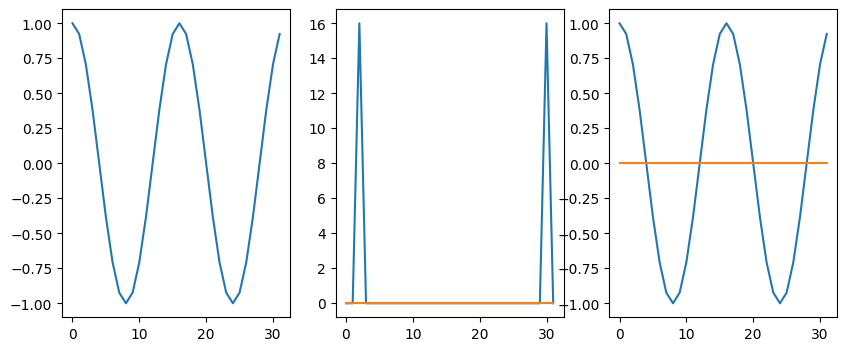

15.999999999999996 16.0 -3.552713678800501e-15


In [2]:
# Question 1
# Look at sin(kx) and cos(kx)

n = 32
x = np.linspace(0,n-1,n)
dx = x[1]-x[0]

k = 2*np.pi * (2/n)
f = np.cos(k*x)

g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
plt.plot(x, np.real(g))
plt.plot(x, np.imag(g))

plt.subplot(133)

h = np.fft.ifft(g)
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))

plt.show()

# Check Parseval's theorem
sumf = np.sum(np.abs(f)**2)
sumg = np.sum(np.abs(g)**2)/n
print(sumf, sumg, sumf-sumg)


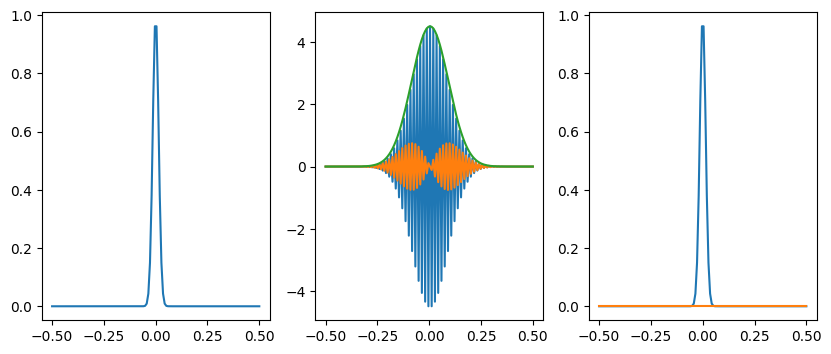

In [3]:
# Gaussian
n = 128
x = np.linspace(-0.5,0.5,n)
dx = x[1]-x[0]

f = np.exp(-(x-0)**2/(0.02**2))
g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
gs = np.fft.fftshift(g)
plt.plot(x, np.real(gs))
plt.plot(x, np.imag(gs))
plt.plot(x, np.abs(gs))

plt.subplot(133)
# Check the inverse transform
h = np.fft.ifft(g)
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))
plt.show()

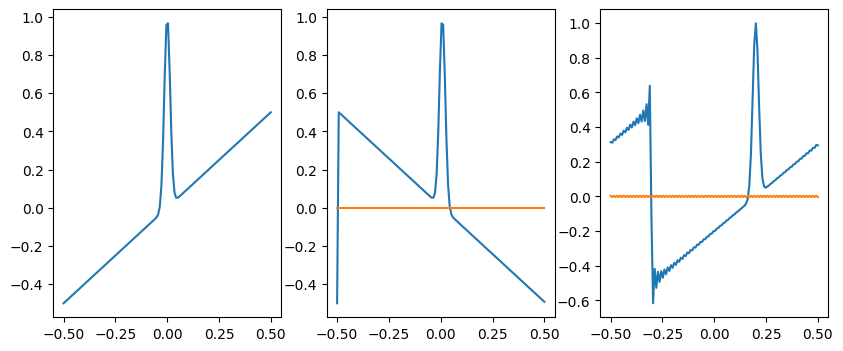

In [4]:
# Question 2

n = 128
x = np.linspace(-0.5,0.5,n)
dx = x[1]-x[0]

f = np.exp(-(x-0)**2/(0.02**2)) + x
g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
# x->-x
h = np.fft.ifft(np.conjugate(g))
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))

plt.subplot(133)
# shift in x
j = complex(0,1)
k = (2*np.pi/dx) * np.fft.fftfreq(n)
g = g * np.exp(-j * k * 0.2)

h = np.fft.ifft(g)
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))
plt.show()

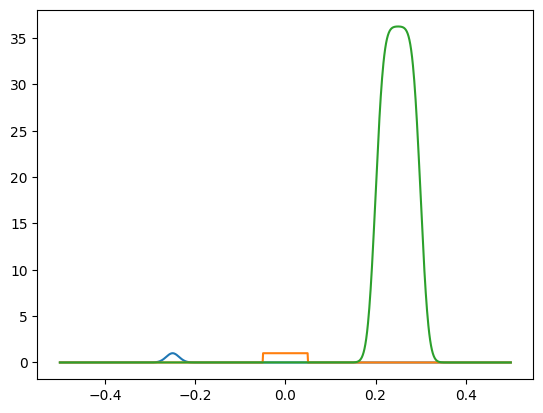

In [5]:
# Question 3

def convolution(f,g):
    ft = np.fft.fft(f)
    gt = np.fft.fft(g)
    return np.fft.ifft(ft*gt)

n = 1024
x = np.linspace(-0.5,0.5,n)
dx = x[1]-x[0]

f = np.exp(-(x+0.25)**2/(0.02**2))
g = np.zeros_like(x)
g[(x>-0.05)&(x<0.05)] = 1

plt.plot(x,f)
plt.plot(x,g)
h = convolution(g,f)
plt.plot(x,np.real(h))


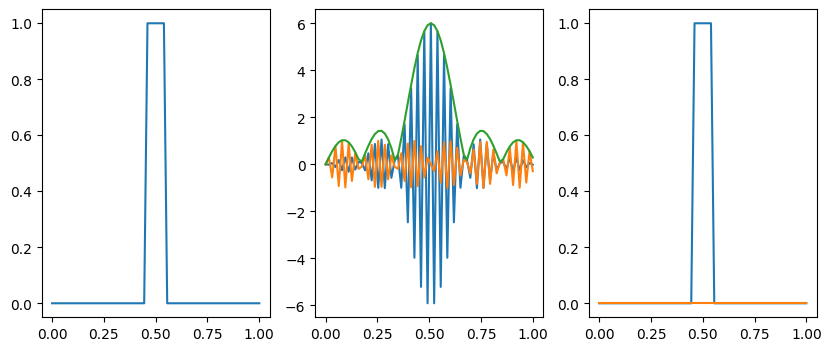

In [6]:
# This wasn't one of the questions, but have a look at the 
# top hat <-> sinc function transform
n = 64
x = np.linspace(0,1,n)
dx = x[1]-x[0]

f = np.zeros_like(x)
f[(x>0.45)&(x<0.55)] = 1

g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
gs = np.fft.fftshift(g)
plt.plot(x, np.real(gs))
plt.plot(x, np.imag(gs))
plt.plot(x, np.abs(gs))

plt.subplot(133)

h = np.fft.ifft(g)
plt.plot(x, np.real(h))
plt.plot(x, np.imag(h))

plt.show()

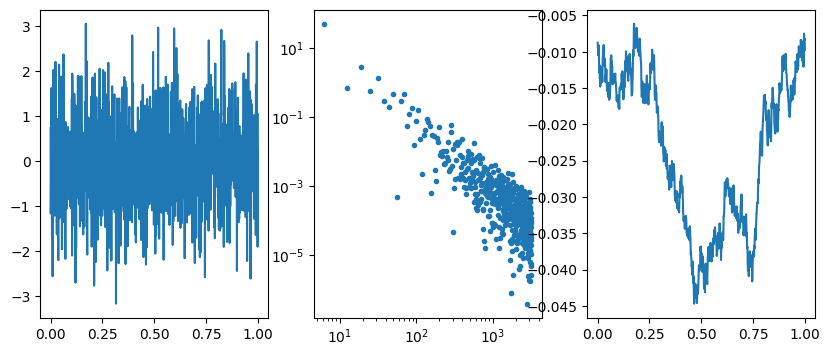

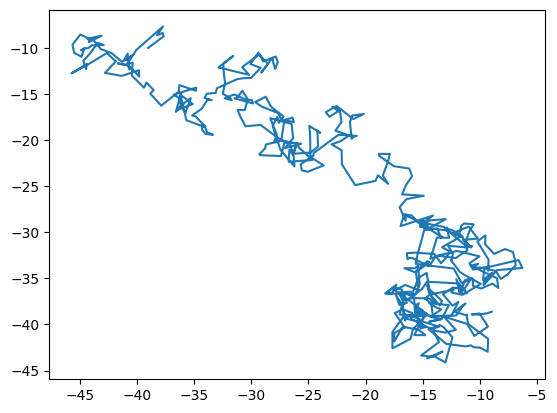

In [7]:
# Question 4

n = 1024
x = np.linspace(0,1,n)
dx = x[1]-x[0]

f = np.random.randn(n)

g = np.fft.fft(f)

fig = plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(x, f)

plt.subplot(132)
g2 = g.copy()
j = complex(0,1)
k = (2*np.pi/dx) * np.fft.fftfreq(n)
g2[1:] /= j*k[1:]

plt.plot(k[k>0], np.abs(g2[k>0])**2, '.')
plt.yscale('log')
plt.xscale('log')

plt.subplot(133)

h = np.fft.ifft(g2)
plt.plot(x, np.real(h))
#plt.plot(x, np.imag(h))

plt.show()

plt.clf()
plt.plot(np.real(h[:n//2])/dx, np.real(h[n//2:])/dx)
plt.show()